In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# IMS

In [2]:
file_path = "D:/IceDyno/IMS_images/2017/ims2017001_4km_v1.3.nc"
ds = xr.open_dataset(file_path)
da = ds["IMS_Surface_Values"]
da

<xarray.DataArray 'IMS_Surface_Values' (time: 1, y: 6144, x: 6144)> Size: 151MB
[37748736 values with dtype=float32]
Coordinates:
  * x        (x) float32 25kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * y        (y) float32 25kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * time     (time) datetime64[ns] 8B 2017-01-01
Attributes:
    grid_mapping:   projection
    short_name:     IMS Surface Values
    standard_name:  area_type
    long_name:      IMS maps of open water, land, sea/lake ice, and snow cove...
    comment:        0: Outside Coverage Area, 1: Open Water, 2: Land Without ...
    flag_values:    [0 1 2 3 4]
    flag_meanings:  outside_coverage_area open_water snow_free_land lake_ice_...

In [3]:
ds.data_vars

Data variables:
    IMS_Surface_Values  (time, y, x) float32 151MB ...
    projection          |S1 1B ...

In [4]:
ds.info()

xarray.Dataset {
dimensions:
	x = 6144 ;
	y = 6144 ;
	time = 1 ;

variables:
	float32 x(x) ;
		x:units = m ;
		x:standard_name = projection_x_coordinate ;
		x:long_name = x coordinate of projection ;
		x:axis = X ;
		x:comment = x values are the centers of the grid cells ;
	float32 y(y) ;
		y:units = m ;
		y:standard_name = projection_y_coordinate ;
		y:long_name = y coordinate of projection ;
		y:axis = Y ;
		y:comment = y values are the centers of the grid cells ;
	datetime64[ns] time(time) ;
		time:CoordinateAxisType = Time ;
		time:axis = T ;
		time:comment = This is the 00Z reference time. Note that products are nowcasted to be valid specifically at the time given here. ;
		time:ioos_category = Time ;
		time:long_name = Centered Time ;
		time:standard_name = time ;
		time:time_origin = 01-JAN-1970 00:00:00 ;
	float32 IMS_Surface_Values(time, y, x) ;
		IMS_Surface_Values:grid_mapping = projection ;
		IMS_Surface_Values:short_name = IMS Surface Values ;
		IMS_Surface_Values:standard

In [5]:
ds.IMS_Surface_Values[0]

<xarray.DataArray 'IMS_Surface_Values' (y: 6144, x: 6144)> Size: 151MB
[37748736 values with dtype=float32]
Coordinates:
  * x        (x) float32 25kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * y        (y) float32 25kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
    time     datetime64[ns] 8B 2017-01-01
Attributes:
    grid_mapping:   projection
    short_name:     IMS Surface Values
    standard_name:  area_type
    long_name:      IMS maps of open water, land, sea/lake ice, and snow cove...
    comment:        0: Outside Coverage Area, 1: Open Water, 2: Land Without ...
    flag_values:    [0 1 2 3 4]
    flag_meanings:  outside_coverage_area open_water snow_free_land lake_ice_...

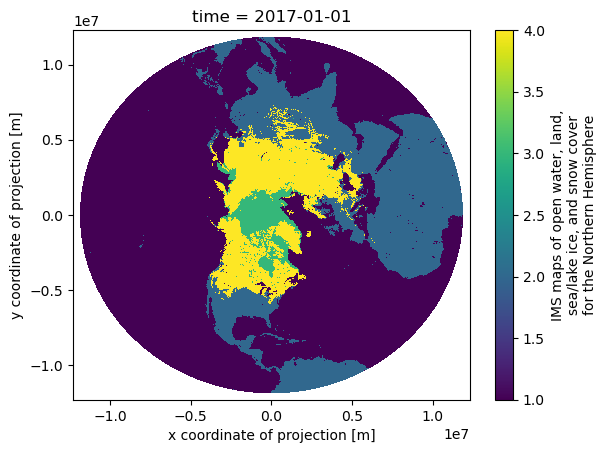

In [6]:
ds.IMS_Surface_Values[0].plot()

In [7]:
ds.dims

FrozenMappingWarningOnValuesAccess({'x': 6144, 'y': 6144, 'time': 1})

In [8]:
ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3',
 'title': 'NOAA/NESDIS Interactive Multisensor Snow and Ice Mapping System (IMS)',
 'summary': 'This file contains a map of snow cover and ice cover for the Northern Hemisphere produced by the Interactive Multisensor Snow and Ice Mapping System (IMS). The map is valid at the time specified by the time_coverage_start and time_coverage_end global attributes. Analysts at the United States National Ice Center (USNIC) use a variety of geostationary and polar orbiting satellite imagery, derived products, in situ, and other data sources to interactively create the map. The system has produced daily analyses from February 1997 to Dec 2014, and twice daily analyses since.',
 'keywords': 'EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EXTENT, EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW COVER, GEOGRAPHIC REGION > ARCTIC, GEOGRAPHIC REGION > POLAR, GEOGRAPHIC REGION > NORTHERN HEMISPHERE',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Keywords

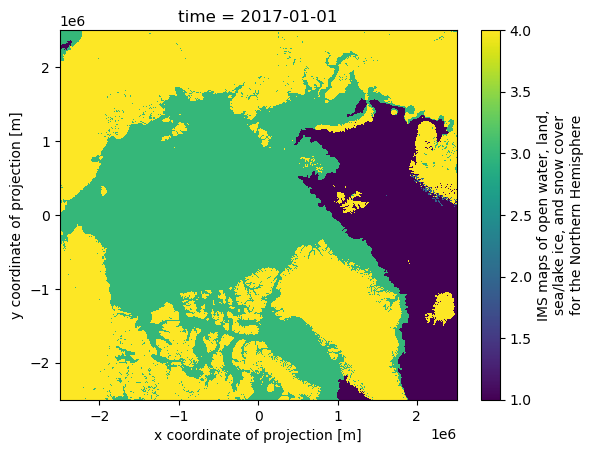

In [9]:
ds.sel(x=slice(-0.25e07, 0.25e07), y=slice(-0.25e07, 0.25e07)).IMS_Surface_Values.plot()

In [10]:
ds.IMS_Surface_Values.coords

Coordinates:
  * x        (x) float32 25kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * y        (y) float32 25kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * time     (time) datetime64[ns] 8B 2017-01-01

In [11]:
np_array = np.array(
    ds.sel(x=slice(-0.25e07, 0.25e07), y=slice(-0.25e07, 0.25e07)).IMS_Surface_Values
)
np_array

array([[[4., 4., 4., ..., 1., 1., 1.],
        [4., 4., 4., ..., 1., 1., 1.],
        [4., 4., 4., ..., 1., 1., 1.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 4., 4., 4.],
        [3., 3., 3., ..., 4., 4., 4.]]], dtype=float32)

# MASIE

In [12]:
file_path = "D:/IceDyno/netcdf/2017/masie_all_r00_v01_2017001_4km.nc"
ds = xr.open_dataset(file_path)
ds.info

<bound method Dataset.info of <xarray.Dataset> Size: 151MB
Dimensions:              (time: 1, x: 6144, y: 6144)
Coordinates:
  * time                 (time) datetime64[ns] 8B 2017-01-01
  * x                    (x) float64 49kB -1.229e+07 -1.228e+07 ... 1.229e+07
    y                    (x) float64 49kB ...
Data variables:
    polar_stereographic  |S1 1B ...
    sea_ice_extent       (time, y, x) float32 151MB ...
Attributes: (12/52)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      Multisensor Analyzed Sea Ice Extent - Norther...
    creator_name:               National Snow and Ice Data Center
    creator_email:              nsidc@nsidc.org
    creator_url:                https://nsidc.org/
    institution:                National Snow and Ice Data Center
    ...                         ...
    date_created:               2021-05-01T03:24:22Z
    history:                    01 May 2021 03:24Z: NetCDF file generated fro...
    time_coverage_start:       

In [13]:
sie_array = ds.sea_ice_extent
sie_array = np.rot90(sie_array, 2)
sie_array.shape

(1, 6144, 6144)

In [14]:
def plot_greenland_array(sie_array, product):
    sie_array = np.rot90(sie_array, 2)
    array_2D = sie_array[0, :, :]

    # Define longitude and latitude bounds
    min_lon, max_lon = 6.0, 35.0
    min_lat, max_lat = 45.0, 55.0

    # Get the longitude values corresponding to the data array
    lon_values = np.linspace(-180.0, 180.0, array_2D.shape[1], endpoint=False)

    # Find the indices corresponding to the specified longitude bounds
    lon_indices = np.where((lon_values >= min_lon) & (lon_values <= max_lon))[0]

    lat_values = np.linspace(0.0, 90.0, array_2D.shape[0], endpoint=False)

    # Find the indices corresponding to the specified latitude bounds
    lat_indices = np.where((lat_values >= min_lat) & (lat_values <= max_lat))[0]

    # Select the subset of the data array based on both longitude and latitude bounds
    subset_data_array = array_2D[lat_indices][:, lon_indices]

    # Print the shape of the subset
    #     print(subset_data_array.shape)

    # Set all all non-3 values to 0
    subset_data_array[subset_data_array != 3] = 0

    # Set all 3 values to 1
    subset_data_array[subset_data_array == 3] = 1

    colors = ["#000000", "#FFFFFF"]
    cmap = ListedColormap(colors, name="custom_colormap", N=len(colors))
    plt.imshow(subset_data_array, cmap=cmap, vmin=0, vmax=len(colors) - 1)
    plt.title(f"{product}: Sea-Ice Extent", fontsize=8)
    plt.axis("off")

    cbar = plt.colorbar(ticks=np.arange(len(colors)))
    cbar.ax.set_yticklabels(
        [
            "Not Sea Ice",
            "Sea Ice",
        ]
    )
    cbar.set_label("Surface Type")
    plt.show()

# Plot both products

## MASIE

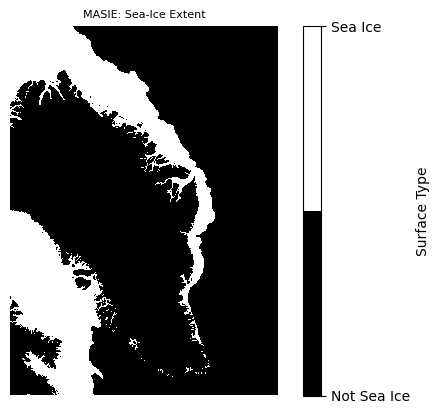

In [15]:
file_path = "D:/IceDyno/netcdf/2017/masie_all_r00_v01_2017001_4km.nc"
ds = xr.open_dataset(file_path)
plot_greenland_array(ds.sea_ice_extent, "MASIE")

## IMS

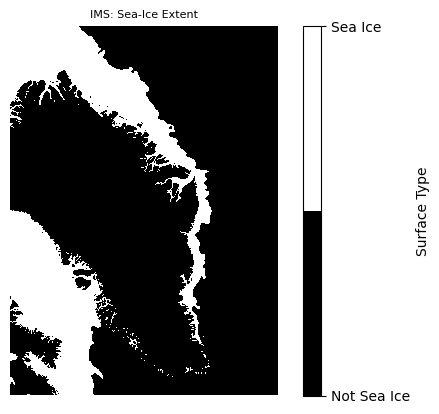

In [16]:
file_path = "D:/IceDyno/IMS_images/2017/ims2017001_4km_v1.3.nc"
ds = xr.open_dataset(file_path)
plot_greenland_array(ds.IMS_Surface_Values, "IMS")